In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [19]:
print("'Price_euros' имеет размерность в евро")

'Price_euros' имеет размерность в евро


Наличие пустых значений

In [20]:
print(df.isnull().any())
print()
print('Вывод: пустых значений нет ни в одной из ячеек')

laptop_ID           False
Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

Вывод: пустых значений нет ни в одной из ячеек


Матрица корреляции
Были удалены все строчные значения, которые нельзя заменить на числа (['laptop_ID', 'Company', 'Product', 'TypeName', 'OpSys', 'Weight', 'ScreenResolution', 'Cpu', 'Gpu']).
Такие параметры, как 'Ram', 'Memory' и прочие были заменены на числа.

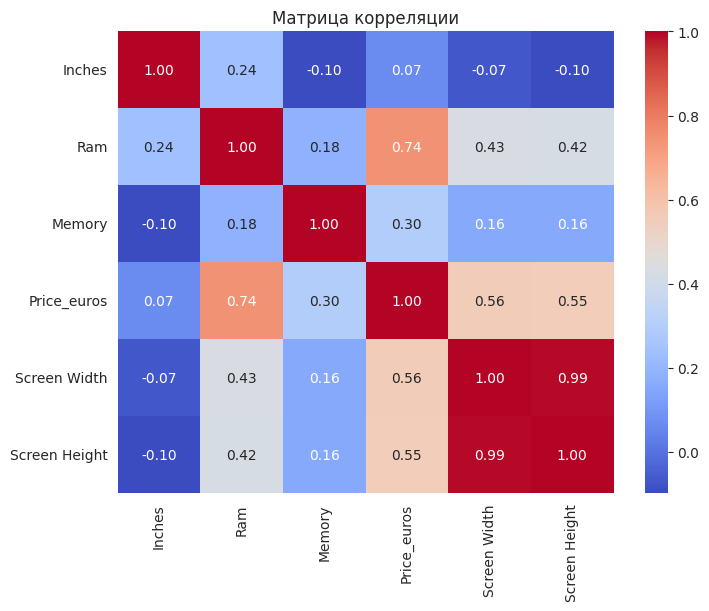

Из построенной матрицы видно, что между собой коррелируют:
 - 'Ram' и 'Price_Euros' (0.74)
 - ШхВ экрана и 'Price_Euros' (0.56)
 - 'Memory' и 'Price_Euros' (0.30)
Остальные параметры между собой связаны слабо или не связаны вообще


In [21]:
numeric_df = df.drop(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'OpSys', 'Weight', 'ScreenResolution', 'Cpu', 'Gpu'])

numeric_df["Screen Width"] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[0].astype(int)
numeric_df["Screen Height"] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[1].astype(int)
numeric_df["Ram"] = df['Ram'].str.extract(r'(\d+)').astype(int)
numeric_df["Memory"] = df['Memory'].str.extract(r'(\d+)').astype(int)

plt.figure(figsize=(8, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

print("Из построенной матрицы видно, что между собой коррелируют:\n - 'Ram' и 'Price_Euros' (0.74)")
print(" - ШхВ экрана и 'Price_Euros' (0.56)")
print(" - 'Memory' и 'Price_Euros' (0.30)")
print("Остальные параметры между собой связаны слабо или не связаны вообще")


boxplot

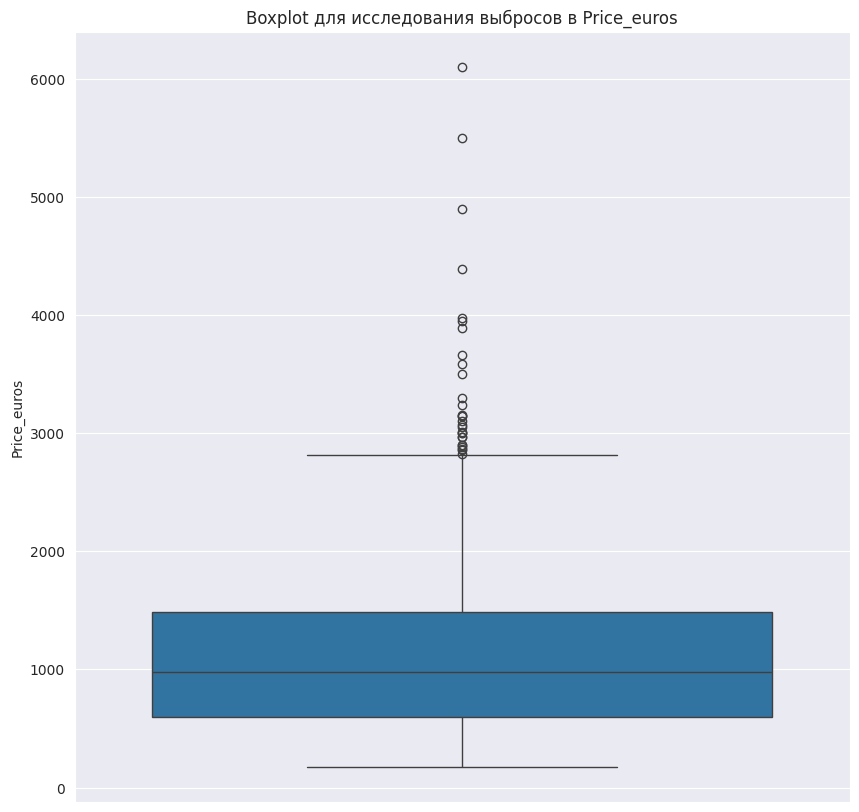


большинство ноутбуков стоят 600-1500 евро. Небольшая часть стоит ~200, некоторые ноутбуки стоят почти 3000 евро.
выбросы есть. больше всего их в районе 3000 евро, меньше выше.
вывод: средний ноутбук стоит 1000 евро, некоторые оч дорогие


In [22]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df['Price_euros'])
plt.title(f'Boxplot для исследования выбросов в Price_euros')
plt.show()

print()
print('большинство ноутбуков стоят 600-1500 евро. Небольшая часть стоит ~200, некоторые ноутбуки стоят почти 3000 евро.')
print('выбросы есть. больше всего их в районе 3000 евро, меньше выше.')
print('вывод: средний ноутбук стоит 1000 евро, некоторые оч дорогие')

Boxplot для всего остального

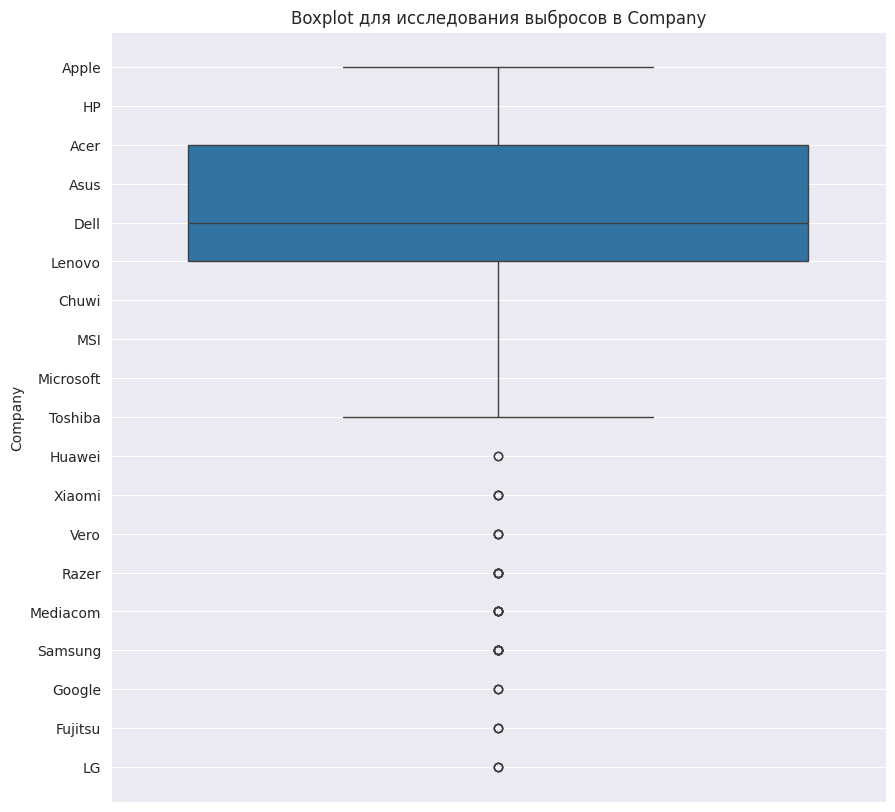

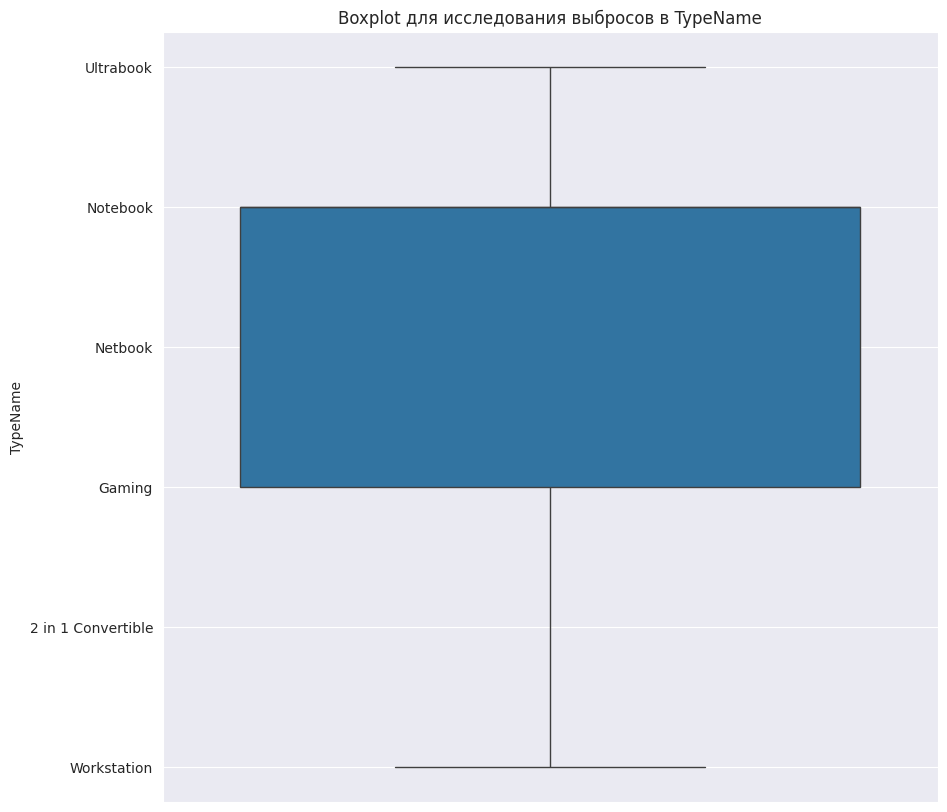

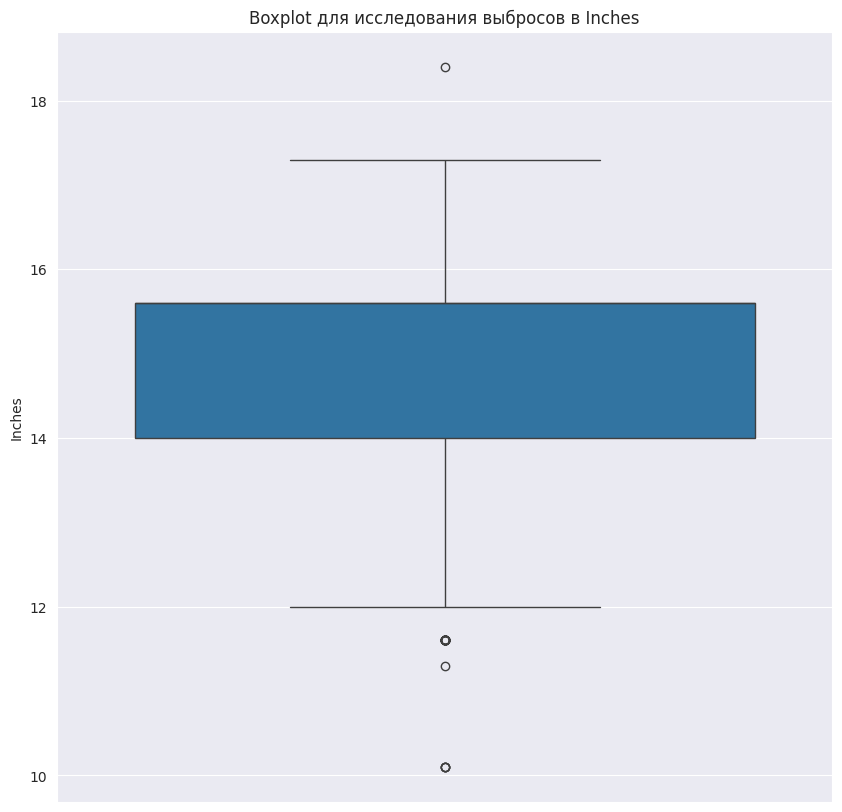

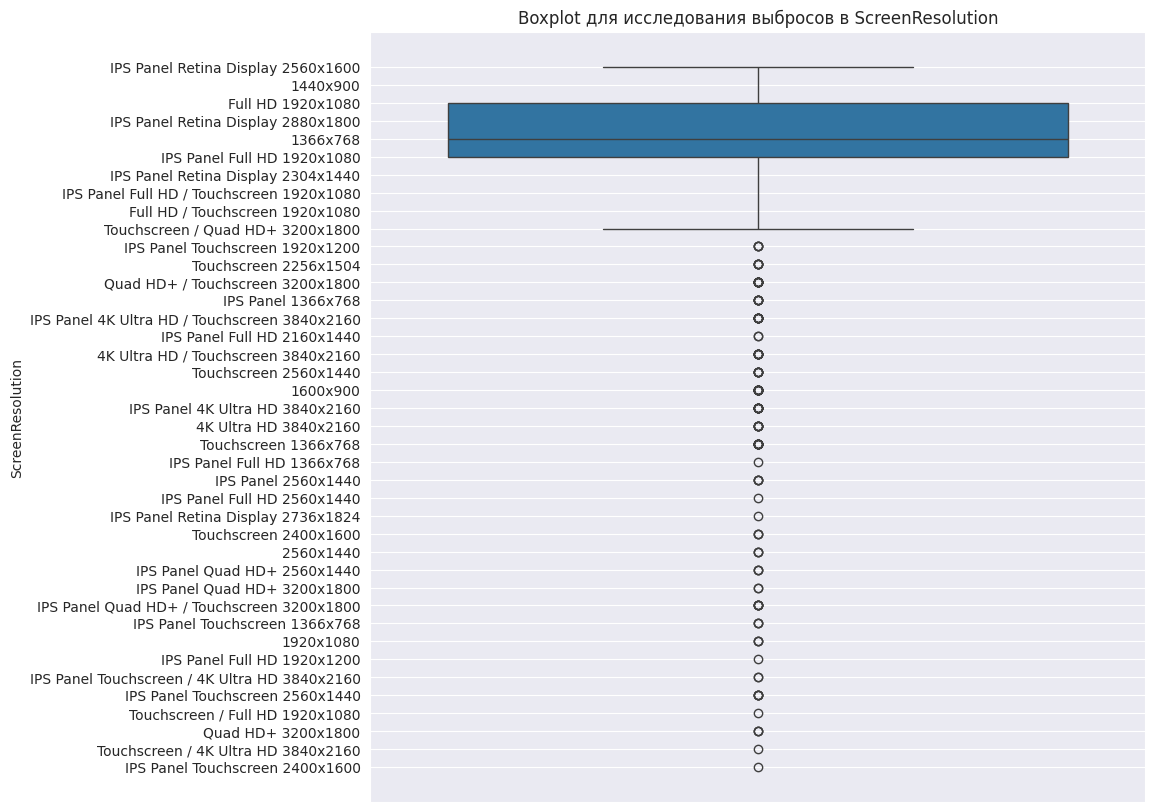

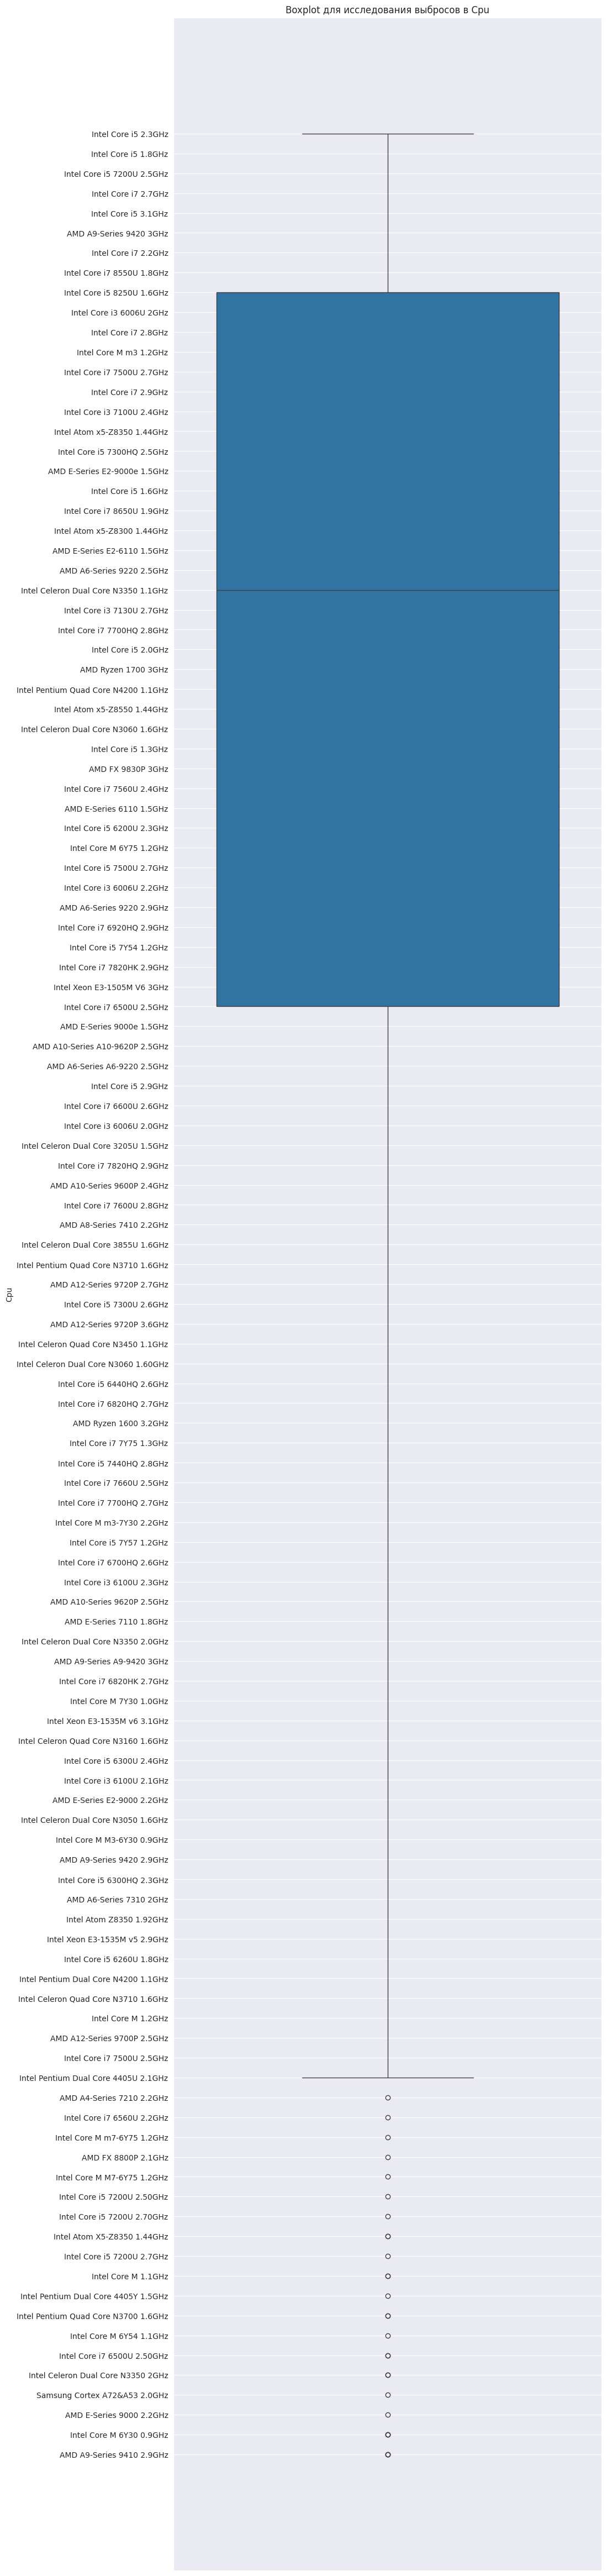

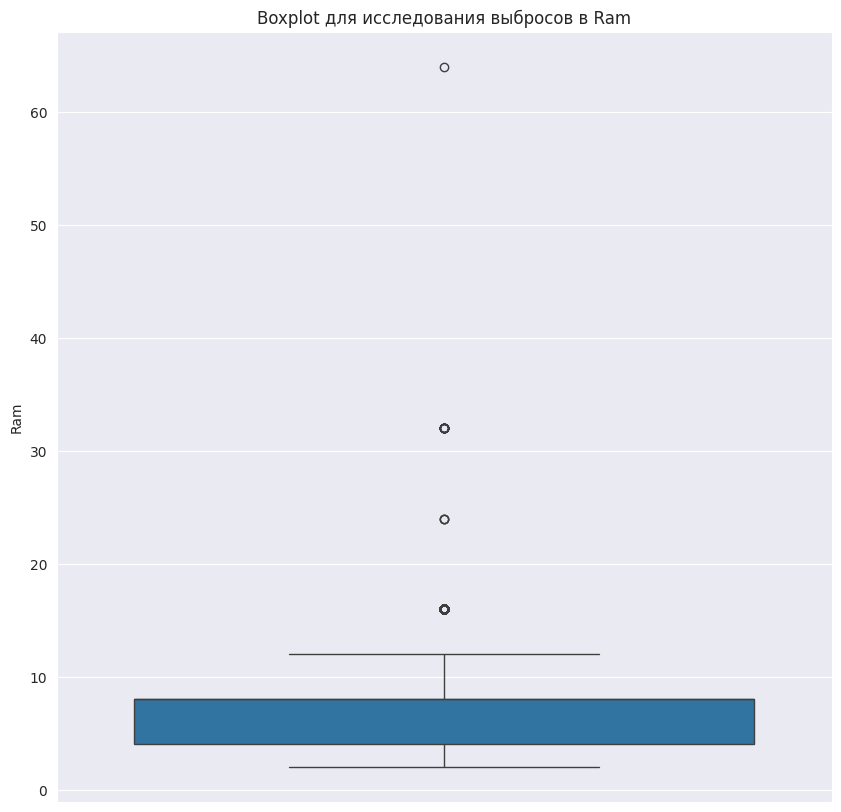

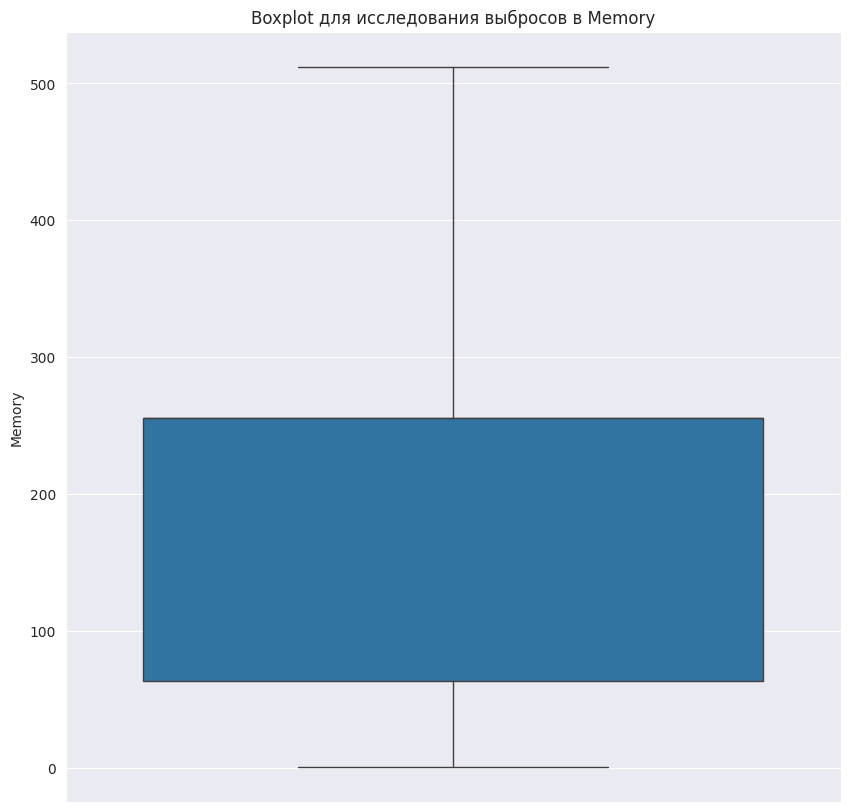

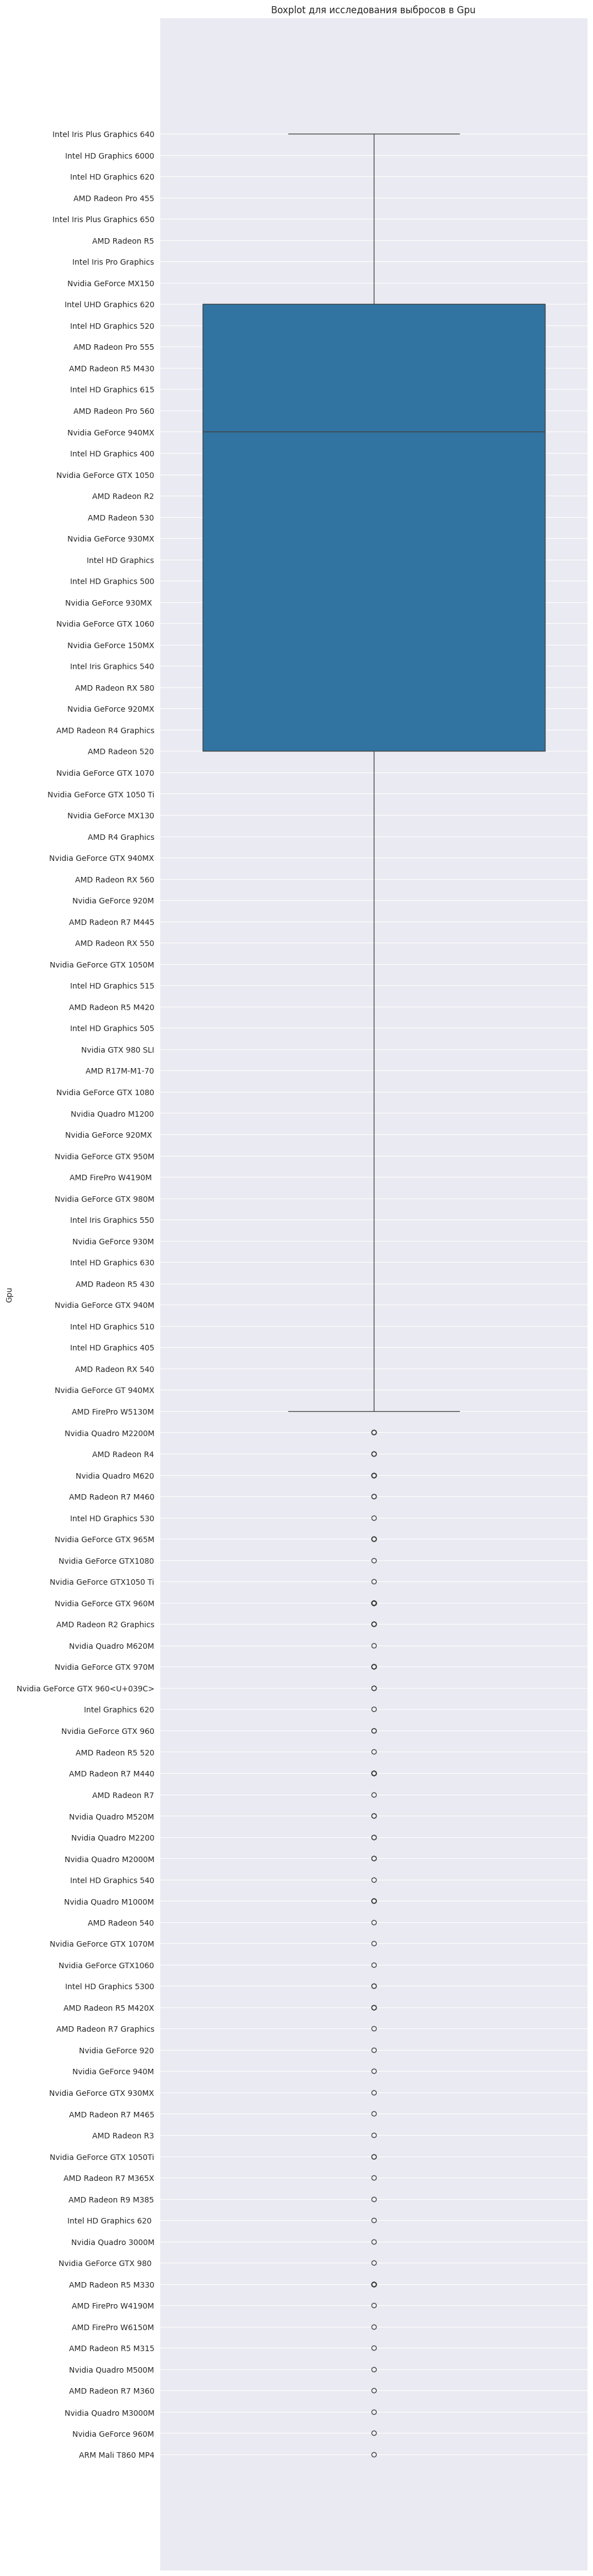

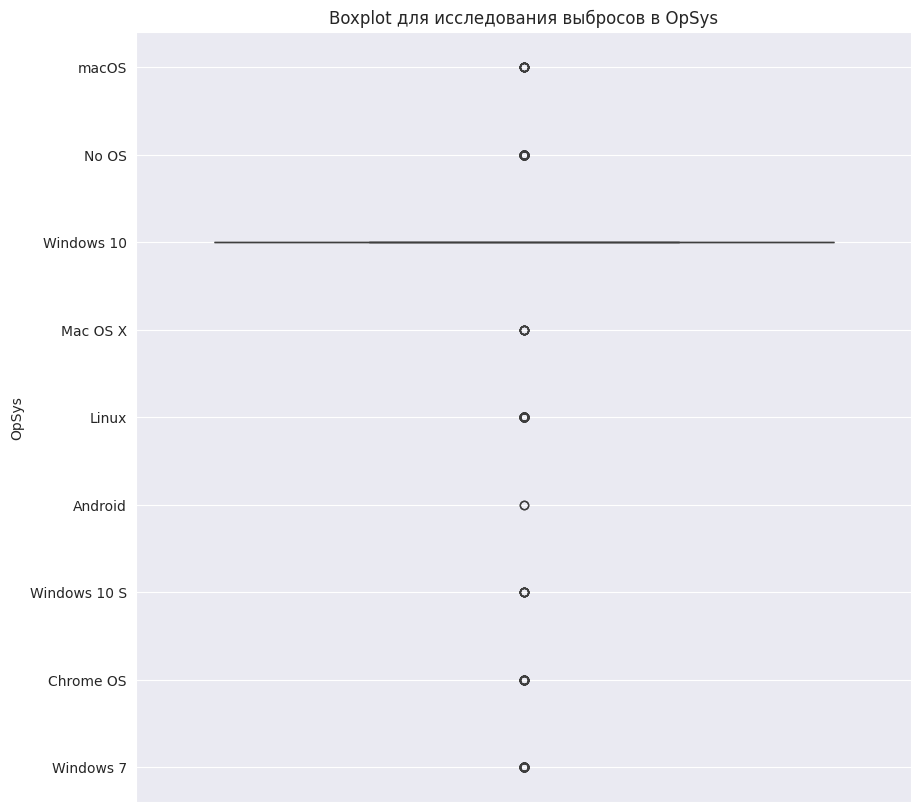

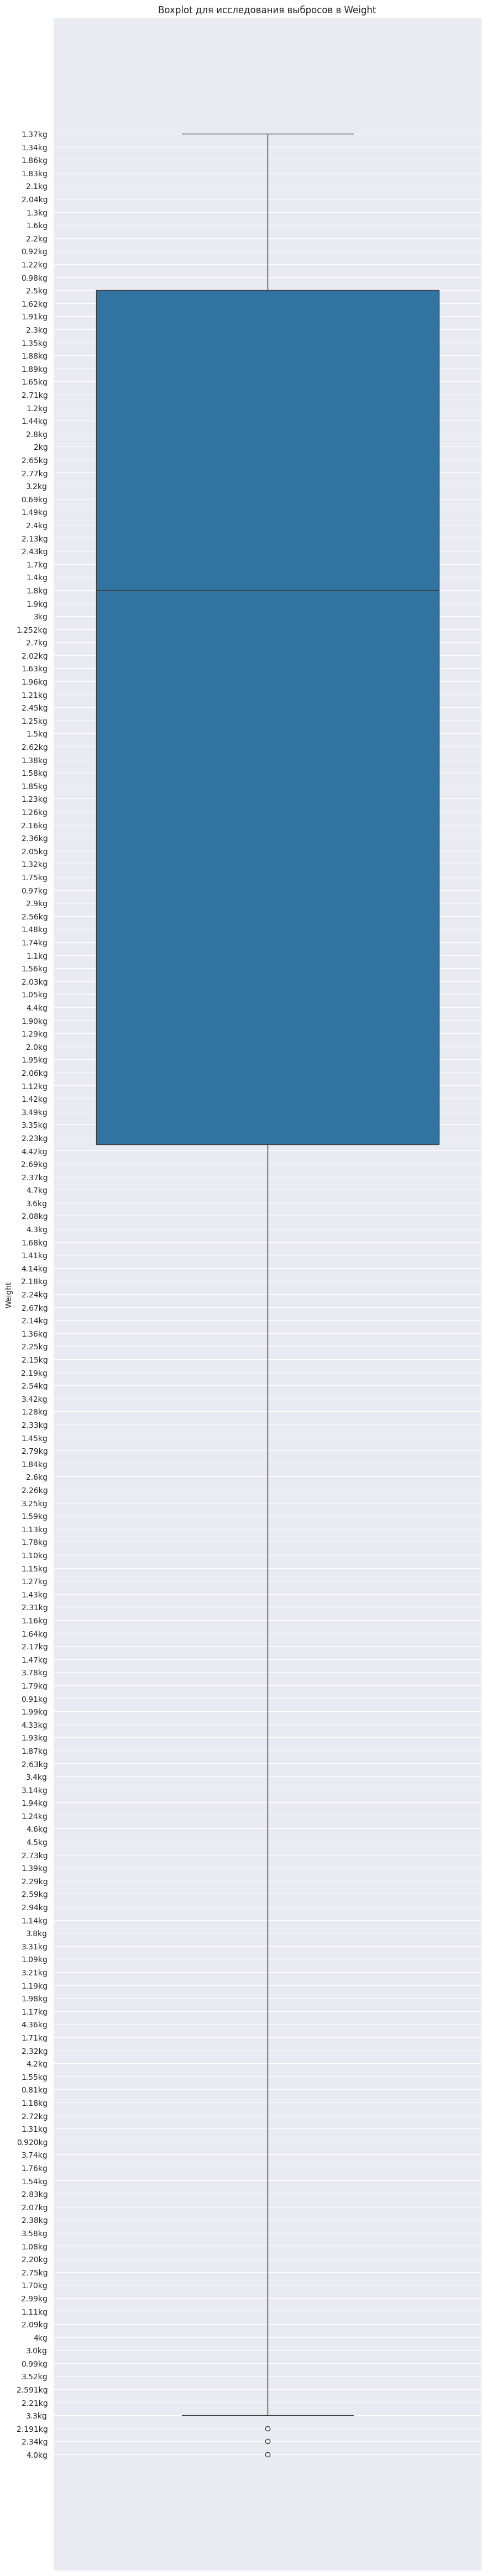

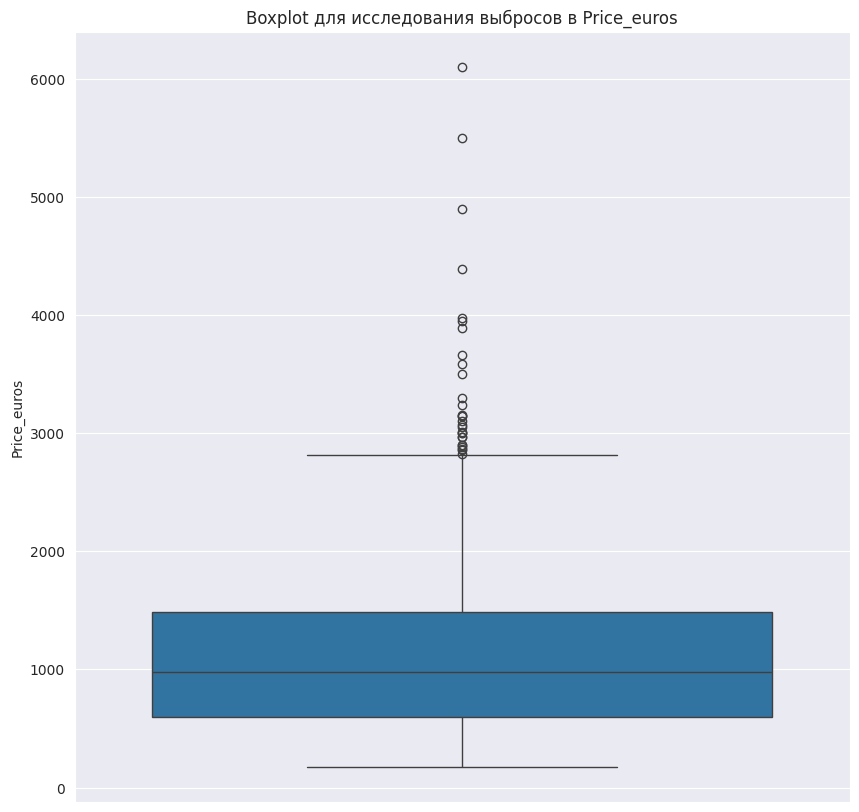

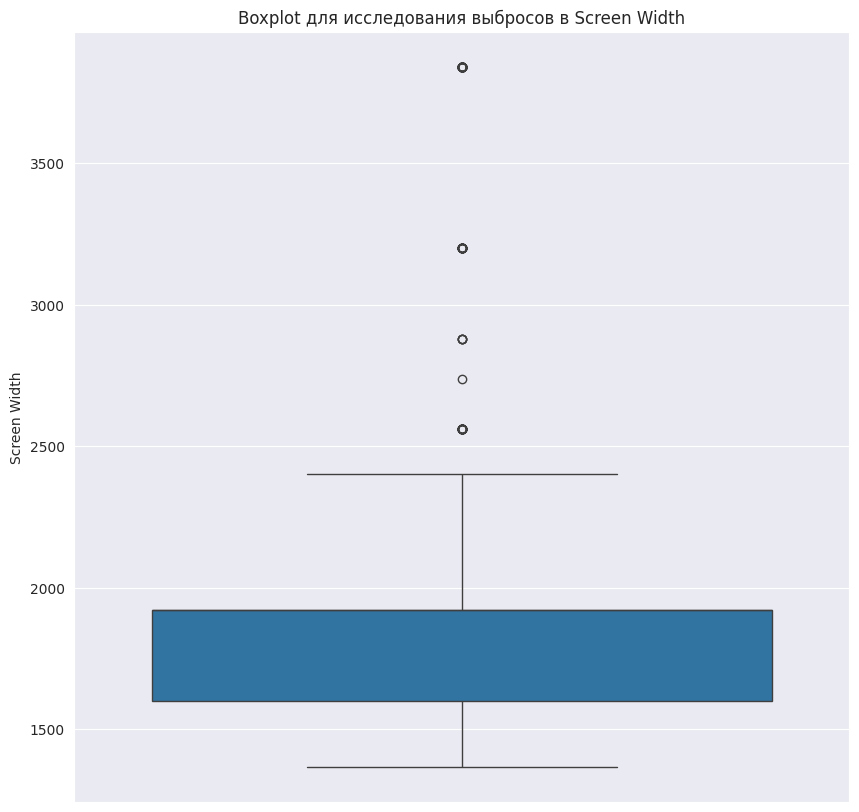

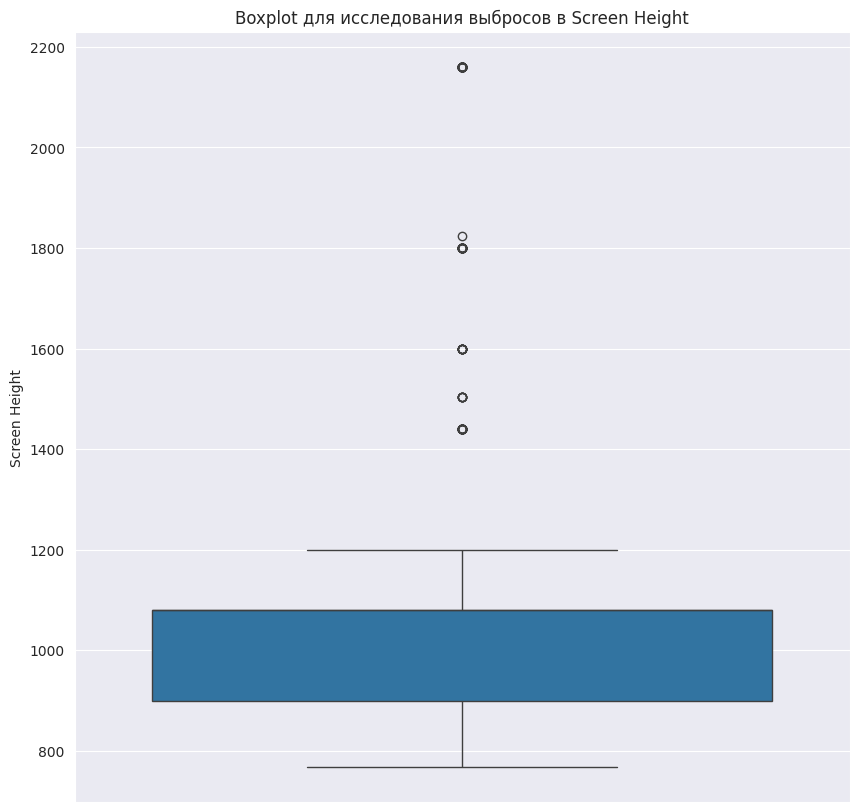

In [27]:
bxplt = df.drop(columns=['laptop_ID', 'Product'])

for i in bxplt:
    if i == "Cpu" or i == "Gpu" or i == "Weight":
        plt.figure(figsize=(10, 60))
    else:
        plt.figure(figsize=(10, 10))
    sns.boxplot(data=df[i])
    plt.title(f'Boxplot для исследования выбросов в {i}')
    plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('laptop_price.csv', encoding='latin1')
# тк 'price' зависит от 'ram', 'memory', 'ШхВ дисплея', то такие данные возьмем в качестве X
df["Screen Width"] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[0].astype(int)
df["Screen Height"] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')[1].astype(int)
df["Ram"] = df['Ram'].str.extract(r'(\d+)').astype(int)
df["Memory"] = df['Memory'].str.extract(r'(\d+)').astype(int)

x_train, x_test, y_train, y_test = train_test_split(df[['Ram', 'Memory', 'Screen Width', 'Screen Height']],
                                                    df['Price_euros'], test_size=0.3)

print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Test dataset size: {x_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_train, y_train)

print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))
print('y=', end="")

for i in range(coeff_df.shape[0]):
    print(f'\'{coeff_df["features"][i]}\'*{round(coeff_df["Coefficient"][i], 2)}', end="")
    if i < 3:
        print(" + ", end="")

print(f' {model.intercept_}')

print()
print("Вывод: 'Ram' - признак значащий, 'Memory' и 'Screen Height' тоже, но слабее. 'Screen Width' не значащий вообще.")
print()
print()

y_pred = model.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print()
print("Среднее отклонение достаточно большое, учитывая, что цена где то в среднем 1000 евро")
print("Квадратиное отклонение очень большое, не оч хорошо")
print('R2 низкое, знач точность тоже низкая')
print()
print()
print()

mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(x_train)
x_norm = pd.DataFrame(x_norm, columns=['f1', 'f2', 'f3', 'f4'])

x_norm_test = mmsc.fit_transform(x_test)
x_norm_test = pd.DataFrame(x_norm_test, columns=['f1', 'f2', 'f3', 'f4'])
# print(x_norm_test.head)

print(f'Train dataset size: {x_norm.shape}, {y_train.shape}')
print(f'Test dataset size: {x_norm_test.shape}, {y_test.shape}')

model = LinearRegression()
model.fit(x_norm, y_train)

print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

features = x_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

print(coeff_df.sort_values(by='Coefficient'))
print('y=', end="")

for i in range(coeff_df.shape[0]):
    print(f'\'{coeff_df["features"][i]}\'*{round(coeff_df["Coefficient"][i], 2)}', end="")
    if i < 3:
        print(" + ", end="")

print(f' + {model.intercept_}')

y_pred = model.predict(x_norm_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

print("Точность упала(")


Train dataset size: (912, 4), (912,)
Test dataset size: (391, 4), (391,)
Веса всех признаков (w1, ..., w13):  [7.50212763e+01 5.99162452e-01 4.03564210e-02 6.04002280e-01]
Свободный коэффицент уравнения w0: -379.0748611349236
   Coefficient       features
2     0.040356   Screen Width
1     0.599162         Memory
3     0.604002  Screen Height
0    75.021276            Ram
y='Ram'*75.02 + 'Memory'*0.6 + 'Screen Width'*0.04 + 'Screen Height'*0.6 -379.0748611349236

Вывод: 'Ram' - признак значащий, 'Memory' и 'Screen Height' тоже, но слабее. 'Screen Width' не значащий вообще.


Mean Absolute Error: 317.79124429909007
Mean Squared Error: 222297.96499280666
R2 score: 0.6323649069665305

Среднее отклонение достаточно большое, учитывая, что цена где то в среднем 1000 евро
Квадратиное отклонение очень большое, не оч хорошо
R2 низкое, знач точность тоже низкая



Train dataset size: (912, 4), (912,)
Test dataset size: (391, 4), (391,)
Веса всех признаков (w1, ..., w13):  [4651.3191292   306.17